In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [204]:
from sklearn import preprocessing

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [148]:
app = pd.read_csv(r"C:\Users\abhay.jamwal\Downloads\google-play-store-apps\googleplaystore.csv")

In [47]:
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [149]:
app.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [150]:
app.dropna(inplace= True)

In [151]:
app.drop_duplicates(inplace = True)

In [152]:
new = []
for i in app.Installs:
    i = i[:-1]
    a = i.replace(",","")
    new.append(float(a))
app.Installs = new


In [105]:
app.Price = app.Price.apply(lambda x : x.replace("$",""))

In [153]:
def change_size(Size):
    if 'M' in Size:
        x = Size[:-1]
        x = float(x) * 1000000
        return(x)
    elif 'k' in Size:
        x = Size[:-1]
        x = float(x)*1000
        return(x)
app.Size = app.Size.map(change_size)


In [154]:
app.Size.dropna(inplace = True)

In [155]:
def change_type(type):
    if type == "Free":
        return(0)
    else:
        return(1)
app.Type = app.Type.map(change_type)

In [156]:
app.Rating = app.Rating.astype(int)
app.Reviews = app.Reviews.astype(int)

In [157]:
app.drop(["Last Updated","Current Ver","Android Ver"],axis = 1,inplace = True)

In [117]:
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,0,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,0,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,0,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,0,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,0,0,Everyone,Art & Design;Creativity


In [161]:
app.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [159]:
def change_price(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        
        price = float(price)
        return price


In [160]:
app.Price = app.Price.map(change_price).astype(float)

In [174]:
app.dtypes

App                object
Category           object
Rating              int32
Reviews             int32
Size              float64
Installs          float64
Type                int64
Price             float64
Content Rating     object
Genres             object
dtype: object

In [ ]:
app = pd.get_dummies(app,columns=[app.Category],drop_first=True)

In [179]:
app.Category.isna().sum()

0

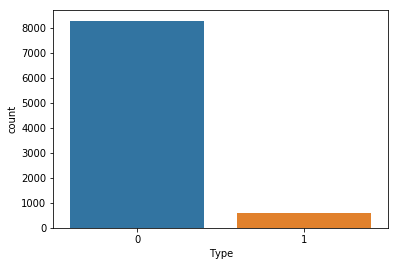

In [182]:
sns.countplot(x = 'Type',data= app)

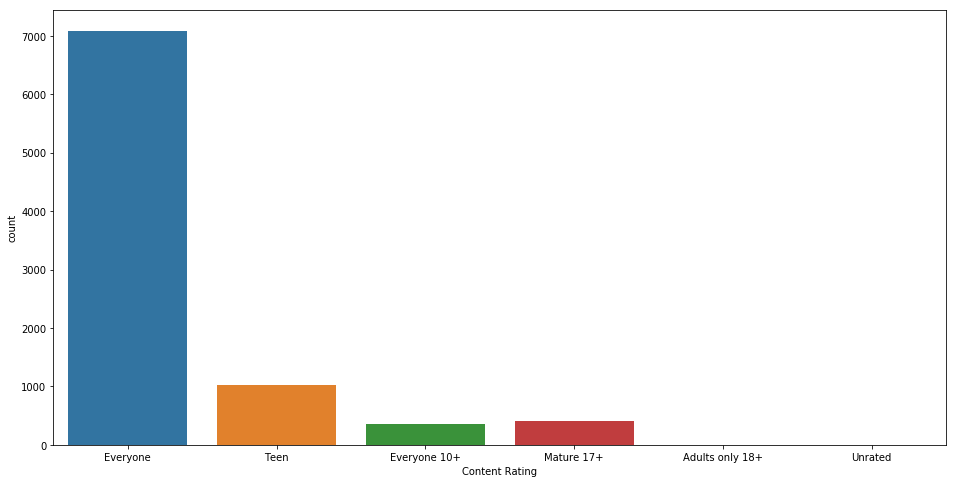

In [188]:
plt.figure(figsize=(16,8))
sns.countplot(x = 'Content Rating',data= app)
plt.show()

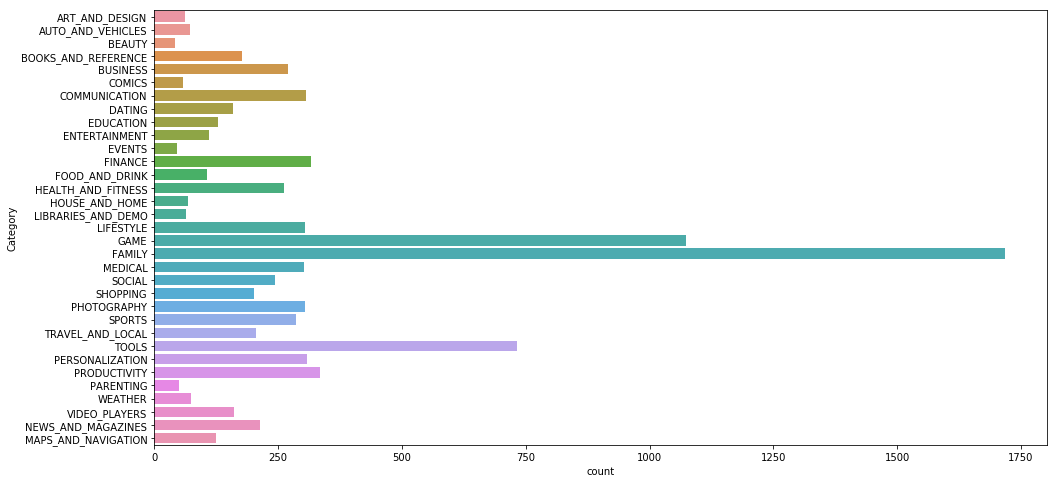

In [194]:
plt.figure(figsize=(16,8))
sns.countplot(y = 'Category',data= app)
plt.show()

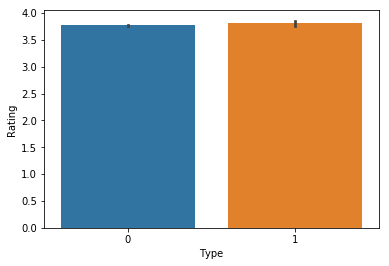

In [184]:
sns.barplot(x = 'Type',y = 'Rating',data = app)

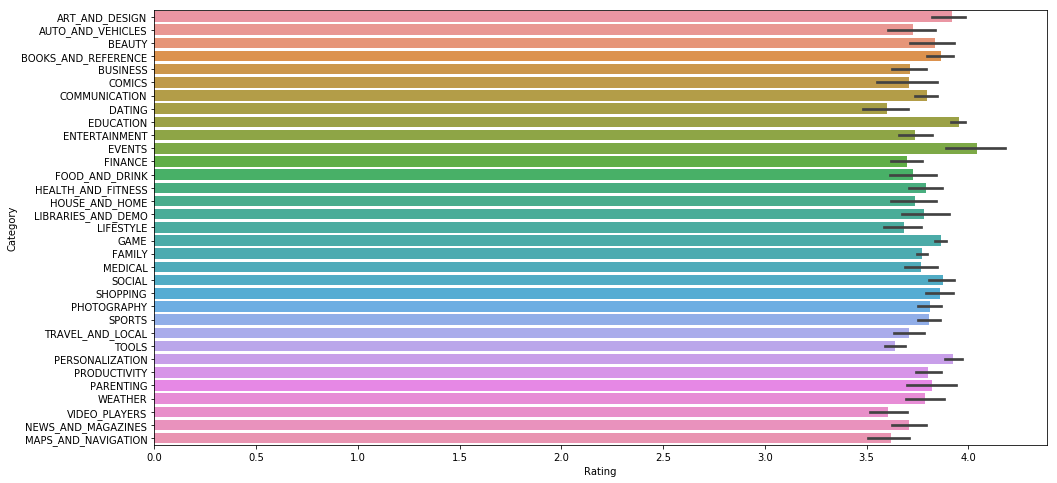

In [191]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'Rating',y = 'Category',data = app)
plt.show()

In [222]:
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19000000.0,10000.0,0,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3,967,14000000.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510,8700000.0,5000000.0,0,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25000000.0,50000000.0,0,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2800000.0,100000.0,0,0.0,Everyone,Art & Design;Creativity


In [223]:
app = pd.get_dummies(app,columns=['App','Category','Content Rating','Genres'],drop_first=True)

,Rating,Reviews,Size,Installs,Type,Price,App_- Free Comics - Comic Apps,App_.R,App_/u/app,App_058.ba,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4,159,19000000.0,10000.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,967,14000000.0,500000.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,87510,8700000.0,5000000.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,215644,25000000.0,50000000.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,967,2800000.0,100000.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
X = app.drop(labels=['Rating'],axis =1 )
y = app.Rating

In [240]:
X.Size.dropna(inplace = True)

In [252]:
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [251]:
X = np.nan_to_num(X)

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)


In [255]:
from sklearn import tree

In [267]:
clf = tree.DecisionTreeRegressor(criterion='mae',max_depth=5, min_samples_leaf=5, random_state=42)


In [268]:
clf.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mae', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [269]:
accuracy = clf.score(X_test,y_test)
accuracy

-0.1810417290258033